# Bussines Understanding

Pertumbuhan supermarket di sebagian besar kota berpenduduk padat semakin meningkat dan persaingan pasar juga tinggi. Dataset ini merupakan salah satu data historis penjualan perusahaan supermarket yang tercatat di 3 cabang berbeda selama 3 bulan. Metode analisis data prediktif mudah diterapkan dengan dataset ini.

# Dataset Description

* Invoice id: Nomor identifikasi faktur penjualan yang dihasilkan oleh komputer
* Branch: Cabang dari supermarket (tersedia 3 cabang yang diidentifikasi dengan A, B, dan C)
* City: Lokasi supermarket
* Customer type: Jenis pelanggan, dicatat sebagai Member untuk pelanggan yang menggunakan kartu anggota dan Normal untuk pelanggan tanpa kartu anggota
* Gender: Jenis kelamin pelanggan
* Product line: Kelompok pengelompokan barang umum - Aksesoris elektronik, Aksesoris fesyen, Makanan dan minuman, Kesehatan dan kecantikan, Rumah dan gaya hidup, Olahraga dan perjalanan
* Unit price: Harga setiap produk dalam dolar ($)
* Quantity: Jumlah produk yang dibeli oleh pelanggan
* Tax: Biaya pajak 5% untuk pembelian pelanggan
* Total: Harga total termasuk pajak
* Date: Tanggal pembelian (Data tersedia dari Januari 2019 hingga Maret 2019)
* Time: Waktu pembelian (dari jam 10 pagi hingga 9 malam)
* Payment: Metode pembayaran yang digunakan pelanggan untuk pembelian (tersedia 3 metode Tunai, Kartu kredit, dan Dompet elektronik)
* COGS: Harga pokok penjualan
* Gross margin percentage: Persentase margin kotor
* Gross income: Pendapatan kotor
* Rating: Penilaian stratifikasi pelanggan berdasarkan pengalaman belanja mereka secara keseluruhan (dengan skala 1 sampai 10) Pengakuan

# Import Library & Read Dataset

In [ ]:
import os
import shutil

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1 (1).csv


In [ ]:
data = pd.read_csv("supermarket_sales - Sheet1.csv")

# Understanding & Cleaning Data

In [ ]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
#Mengekstrak date menjadi, month, day, year
# Ubah kolom 'Date' dari string (object) ke datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

# Ekstrak hari, bulan, dan tahun ke kolom baru
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day_name()
data['Year'] = data['Date'].dt.year
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January,Saturday,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March,Friday,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March,Sunday,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January,Sunday,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February,Friday,2019


In [ ]:
data.shape

(1000, 20)

In [ ]:
data.size

20000

In [ ]:
types = data.dtypes
missing_values = data.isnull().sum()
duplicated_rows = data.duplicated().sum()
unique_values = data.nunique()

data_summary = pd.DataFrame({
    "Data Types": types,
    "Missing values": missing_values,
    "Duplicated values": duplicated_rows,
    "Unique values": unique_values
})

cat_var = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Day', 'Month']
data_summary['Categorical'] = data_summary.index.isin(cat_var)
print(f'Kolom kategorikal: {cat_var}\n')
data_summary

Kolom kategorikal: ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Day', 'Month']



,Data Types,Missing values,Duplicated values,Unique values,Categorical
Invoice ID,object,0,0,1000,False
Branch,object,0,0,3,True
City,object,0,0,3,True
Customer type,object,0,0,2,True
Gender,object,0,0,2,True
Product line,object,0,0,6,True
Unit price,float64,0,0,943,False
Quantity,int64,0,0,10,False
Tax 5%,float64,0,0,990,False
Total,float64,0,0,990,False


dalam data ini memiliki lumayan banyak kolom kategorikal seperti 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Day', 'Month'

# Data Analysis

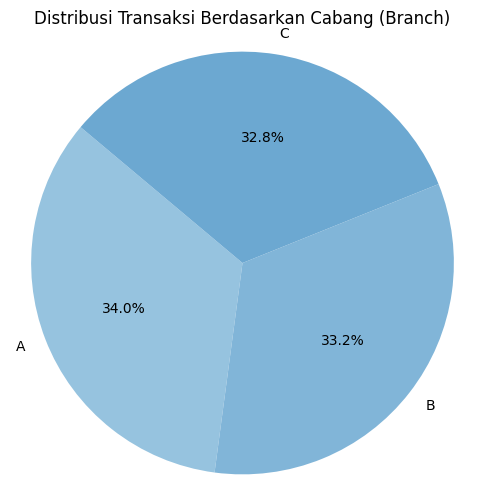

In [ ]:
# Hitung proporsi tiap kategori Branch
branch_counts = data['Branch'].value_counts()

# Warna opsional untuk tampilan lebih menarik
colors=sns.color_palette('Blues_d', n_colors=10)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Transaksi Berdasarkan Cabang (Branch)')
plt.axis('equal')  # Supaya pie-nya bulat sempurna
plt.show()

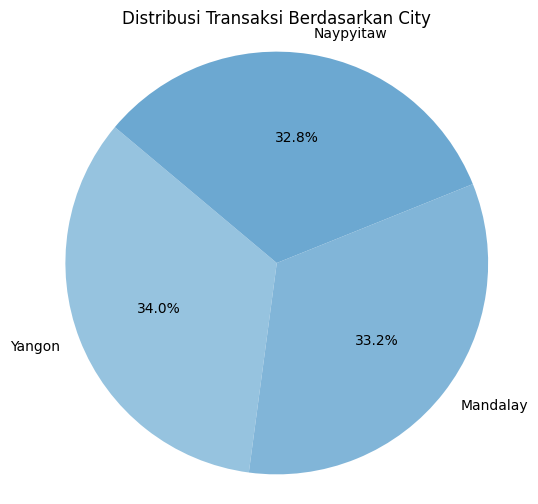

In [ ]:
# Hitung proporsi tiap kategori city
city_counts = data['City'].value_counts()

# Warna opsional untuk tampilan lebih menarik
colors=sns.color_palette('Blues_d', n_colors=10)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Transaksi Berdasarkan City')
plt.axis('equal')  # Supaya pie-nya bulat sempurna
plt.show()

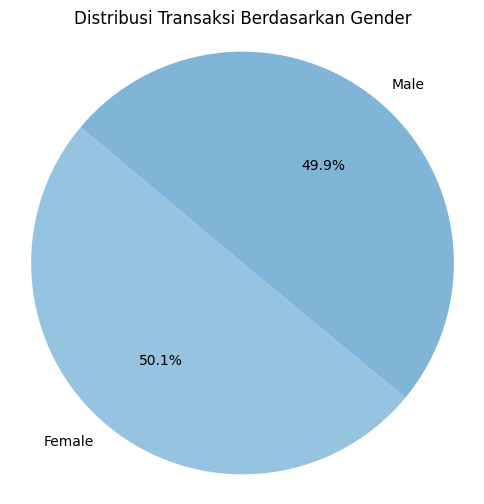

In [ ]:
# Hitung proporsi tiap kategori gender
gender_counts = data['Gender'].value_counts()

# Warna opsional untuk tampilan lebih menarik
colors=sns.color_palette('Blues_d', n_colors=10)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Transaksi Berdasarkan Gender')
plt.axis('equal')  # Supaya pie-nya bulat sempurna
plt.show()

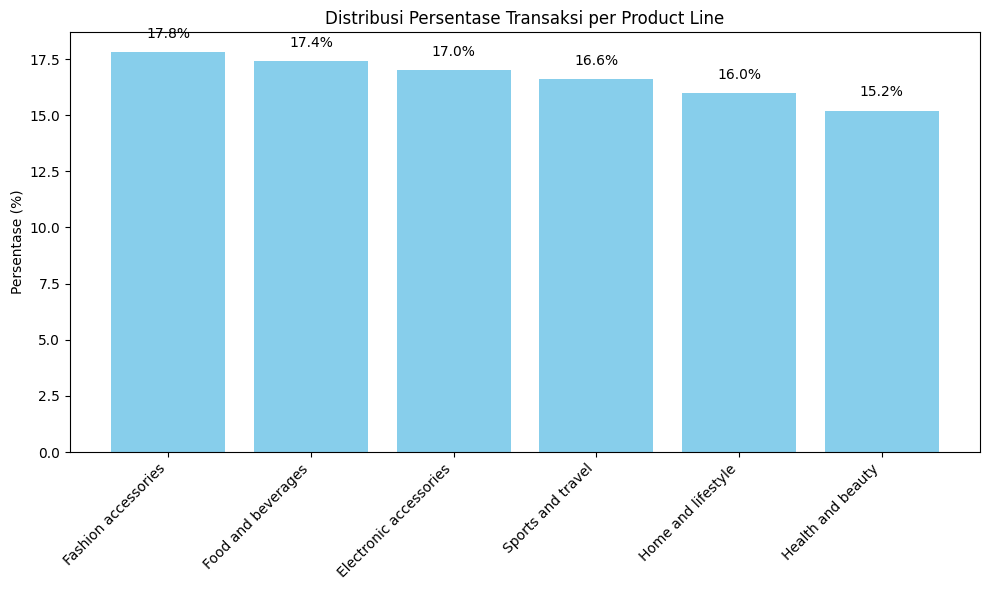

In [ ]:
# Hitung frekuensi per kategori Product line (dalam persentase)
product_counts = data['Product line'].value_counts(normalize=True) * 100
product_counts = product_counts.sort_values(ascending=False)

# Buat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(product_counts.index, product_counts.values, color='skyblue')

# Tambahkan judul dan label
plt.title('Distribusi Persentase Transaksi per Product Line')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45, ha='right')

# Tambahkan label persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


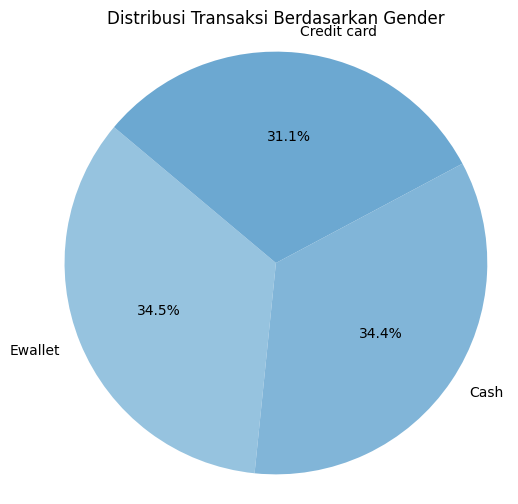

In [ ]:
# Hitung proporsi tiap kategori payment
payment_counts = data['Payment'].value_counts()

# Warna opsional untuk tampilan lebih menarik
colors=sns.color_palette('Blues_d', n_colors=10)

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Transaksi Berdasarkan Payment')
plt.axis('equal')  # Supaya pie-nya bulat sempurna
plt.show()

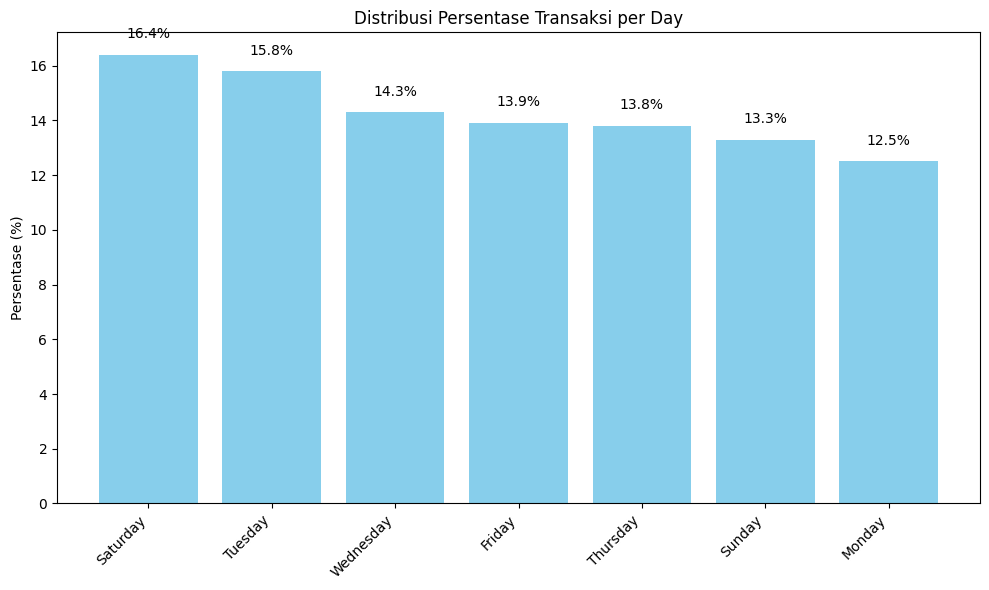

In [ ]:
# Hitung frekuensi per kategori day (dalam persentase)
day_counts = data['Day'].value_counts(normalize=True) * 100
day_counts = day_counts.sort_values(ascending=False)

# Buat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(day_counts.index, day_counts.values, color='skyblue')

# Tambahkan judul dan label
plt.title('Distribusi Persentase Transaksi per Day')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45, ha='right')

# Tambahkan label persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

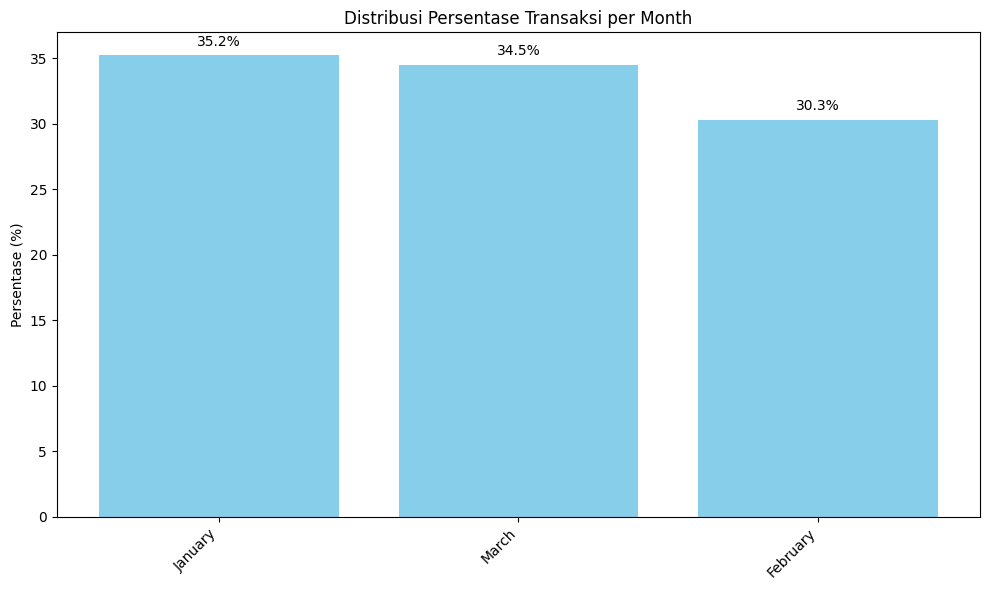

In [ ]:
# Hitung frekuensi per kategori month (dalam persentase)
month_counts = data['Month'].value_counts(normalize=True) * 100
month_counts = month_counts.sort_values(ascending=False)

# Buat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index, month_counts.values, color='skyblue')

# Tambahkan judul dan label
plt.title('Distribusi Persentase Transaksi per Month')
plt.ylabel('Persentase (%)')
plt.xticks(rotation=45, ha='right')

# Tambahkan label persentase di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

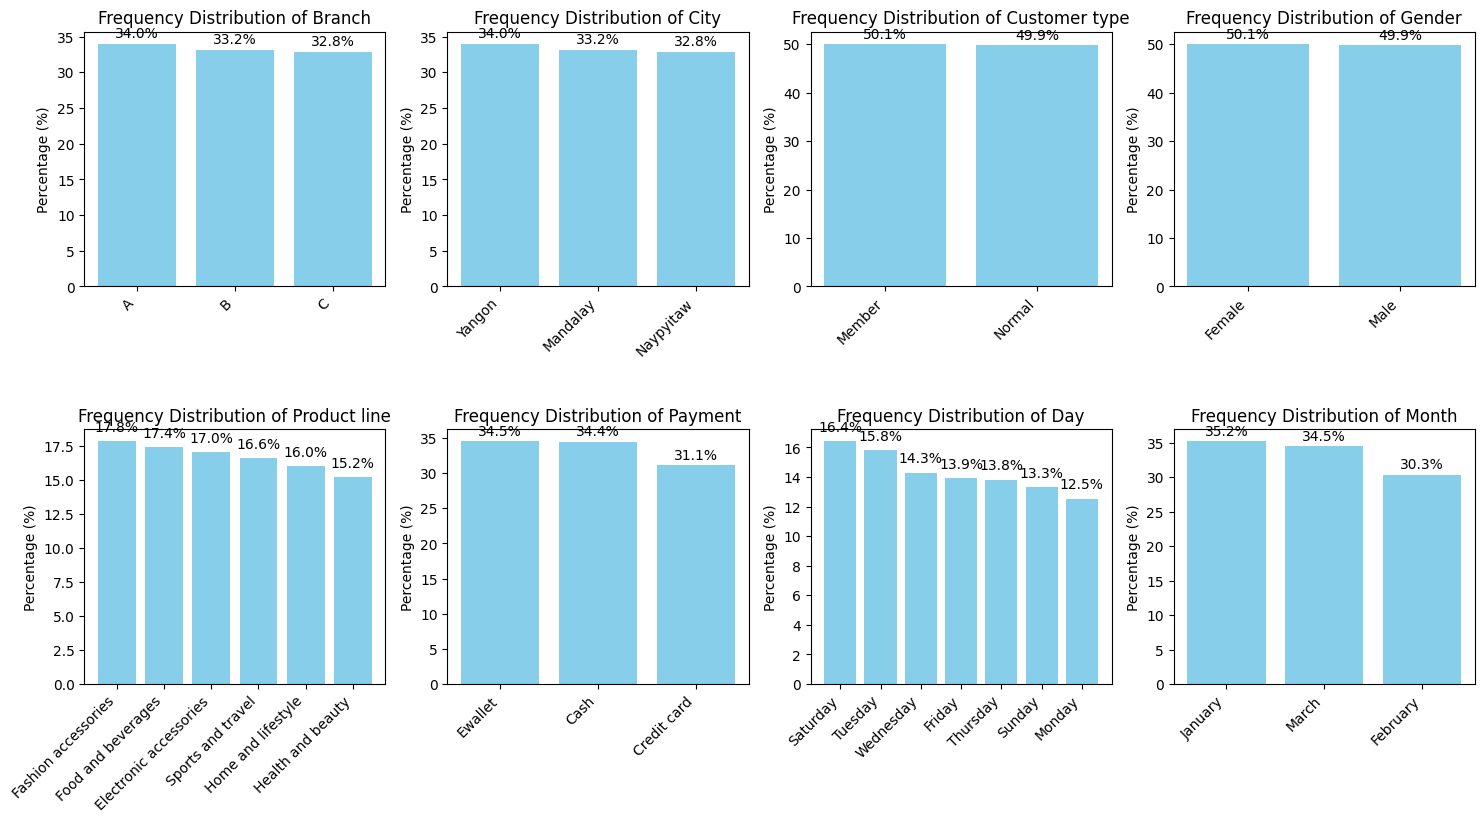

Frequency Distribution of Branch in %:
Branch
A    34.0
B    33.2
C    32.8
Name: proportion, dtype: float64


Frequency Distribution of City in %:
City
Yangon       34.0
Mandalay     33.2
Naypyitaw    32.8
Name: proportion, dtype: float64


Frequency Distribution of Customer type in %:
Customer type
Member    50.1
Normal    49.9
Name: proportion, dtype: float64


Frequency Distribution of Gender in %:
Gender
Female    50.1
Male      49.9
Name: proportion, dtype: float64


Frequency Distribution of Product line in %:
Product line
Fashion accessories       17.8
Food and beverages        17.4
Electronic accessories    17.0
Sports and travel         16.6
Home and lifestyle        16.0
Health and beauty         15.2
Name: proportion, dtype: float64


Frequency Distribution of Payment in %:
Payment
Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: proportion, dtype: float64


Frequency Distribution of Day in %:
Day
Saturday     16.4
Tuesday      15.8
Wednesday    14.3
Friday

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(cat_var):
    if i < len(axes):
        value_counts = data[column].value_counts(normalize=True) * 100
        value_counts = value_counts.sort_values(ascending=False)
        ax = axes[i]
        bars = ax.bar(value_counts.index, value_counts.values, color='skyblue')
        ax.set_title(f'Frequency Distribution of {column}')
        ax.set_ylabel('Percentage (%)')
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

        # Add text labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2.0,
                height + 0.5,
                f'{height:.1f}%',
                ha='center',
                va='bottom'
            )

for i in range(len(cat_var), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

for column in cat_var:
    print(f"Frequency Distribution of {column} in %:")
    print(data[column].value_counts(normalize=True) * 100)
    print("\n")

Branch/Gudang
* Dari tiga cabang (A, B, C) supermarket disetiap kota, cabang A merupakan cabang yang memiliki jumlah persentase transaksi tertinggi yaitu sebesar 34%. Namun untuk cabang lain (B, C), tidak jauh rendah dari cabang A, yaitu untuk cabang B jumlah persentase transaksinya sebesar 33,2% dan cabang C jumlah persentase transaksinya sebesar 32,8%.

City/Kota
* Kota yang memiliki jumlah persentase transaksi tertinggi yaitu di kota Yangon sebesar 34% (Cabang A). Kemudian selanjutnya kota Mandalay dengan jumlah persentase transaksi sebesar 33,2% (Cabang B). Dan kota Naypyitaw dengan jumlah persentase transaksi terendah sebesar 32,8% (Cabang C) namun tidak terlalu jauh rendah dari kota-kota lain.

Customer Type
* Dari keseluruhan transaksi, customer type member ataupun normal hampir sama dengan persentase traksaksi customer type yang memiliki member sebesar 50,1%, sedangkan yang normal sebesar 49,9&

Gender
* Persentase transaksi yang bergender male ataupun female hampir sama

Product Line
* top 3 persentase transaksi kategori produk ialah Fashion accessories (17,8%), Food and beverages (17,4%), dan Electronic accessories (17%)

Payment
* Persentase transaksi dengan metode pembayaran yang digunakan hampir sama antara E-wallet, Cash, dan Credit Card

Day
* Persentase transaksi tertinggi ada pada hari sabtu sebesar 16,4%, dan persentase transaksi terendah ada pada hari senin sebesar 12,5%

Month
* Persentase transaksi tertinggi dari 3 bulan yaitu ada pada bulan January sebesar 35,2%



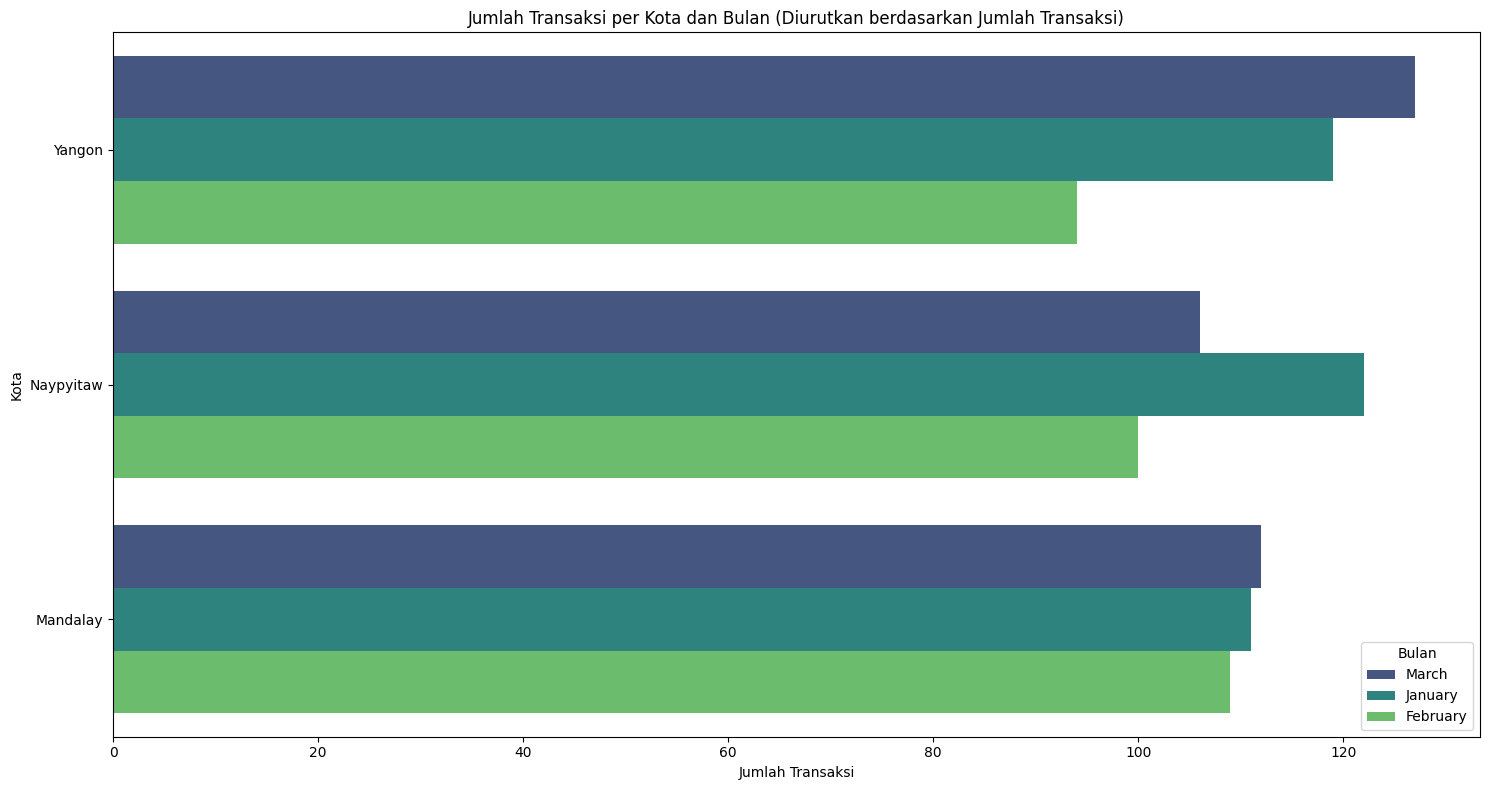

Jumlah Transaksi per Kota dan Bulan:
        City     Month  Transaction Count
8     Yangon     March                127
4  Naypyitaw   January                122
7     Yangon   January                119
2   Mandalay     March                112
1   Mandalay   January                111
0   Mandalay  February                109
5  Naypyitaw     March                106
3  Naypyitaw  February                100
6     Yangon  February                 94

Bulan dengan Jumlah Transaksi Tertinggi di Setiap Kota:
        City    Month  Transaction Count
2   Mandalay    March                112
4  Naypyitaw  January                122
8     Yangon    March                127


In [ ]:
city_month_transactions = data.groupby(['City', 'Month'])['Invoice ID'].count().reset_index()

city_month_transactions = city_month_transactions.rename(columns={'Invoice ID': 'Transaction Count'})

city_month_transactions = city_month_transactions.sort_values('Transaction Count', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='Transaction Count', y='City', hue='Month', data=city_month_transactions, palette='viridis')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kota')
plt.title('Jumlah Transaksi per Kota dan Bulan (Diurutkan berdasarkan Jumlah Transaksi)')
plt.legend(title='Bulan')
plt.tight_layout()
plt.show()

print("Jumlah Transaksi per Kota dan Bulan:")
print(city_month_transactions)

highest_transactions_per_city = city_month_transactions.loc[city_month_transactions.groupby('City')['Transaction Count'].idxmax()]

print("\nBulan dengan Jumlah Transaksi Tertinggi di Setiap Kota:")
print(highest_transactions_per_city)

* Total transaksi tertinggi pada kota Mandalay terdapat pada bulan March sebanyak 112 transaksi
* Total transaksi tertinggi pada kota Naypyitaw terdapat pada bulan January sebanyak 122 transaksi
* Total transaksi tertinggi pada kota Yangon terdapat pada bulan March sebanyak 127 transaksi

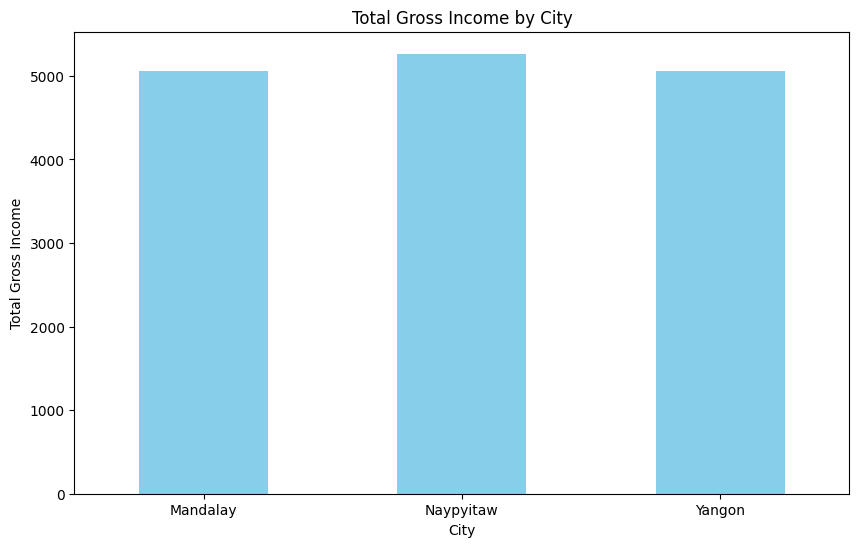

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64


In [ ]:
city_gross_income = data.groupby('City')['gross income'].sum()

plt.figure(figsize=(10, 6))
city_gross_income.plot(kind='bar', color='skyblue')
plt.title('Total Gross Income by City')
plt.xlabel('City')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=0)
plt.show()

print(city_gross_income)

In [ ]:
city_gross = data.groupby('City')['gross income'].sum()

total_gross = city_gross.sum()
city_percentage = (city_gross / total_gross) * 100

city_percentage = city_percentage.sort_values(ascending=False)

print("Persentase Gross Income per Kota:")
for city, percentage in city_percentage.items():
  print(f"{city}: {percentage:.2f}%")

most_profitable_city = city_percentage.idxmax()
highest_percentage = city_percentage.max()

print(f"\nKota yang paling menguntungkan adalah {most_profitable_city} dengan persentase {highest_percentage:.2f}% dari total gross income.")

Persentase Gross Income per Kota:
Naypyitaw: 34.24%
Yangon: 32.88%
Mandalay: 32.88%

Kota yang paling menguntungkan adalah Naypyitaw dengan persentase 34.24% dari total gross income.


Total pendapatan kotor terbanyak terdapat di kota Naypyitaw (Cabang C)

        City     Month  gross income  Percentage
4  Naypyitaw   January     1925.4610   12.519766
7     Yangon   January     1841.9585   11.976815
8     Yangon     March     1793.2915   11.660371
5  Naypyitaw     March     1771.3830   11.517917
1   Mandalay   January     1770.2885   11.510801
2   Mandalay     March     1647.4925   10.712354
0   Mandalay  February     1639.2510   10.658766
3  Naypyitaw  February     1568.3325   10.197639
6     Yangon  February     1421.9105    9.245571


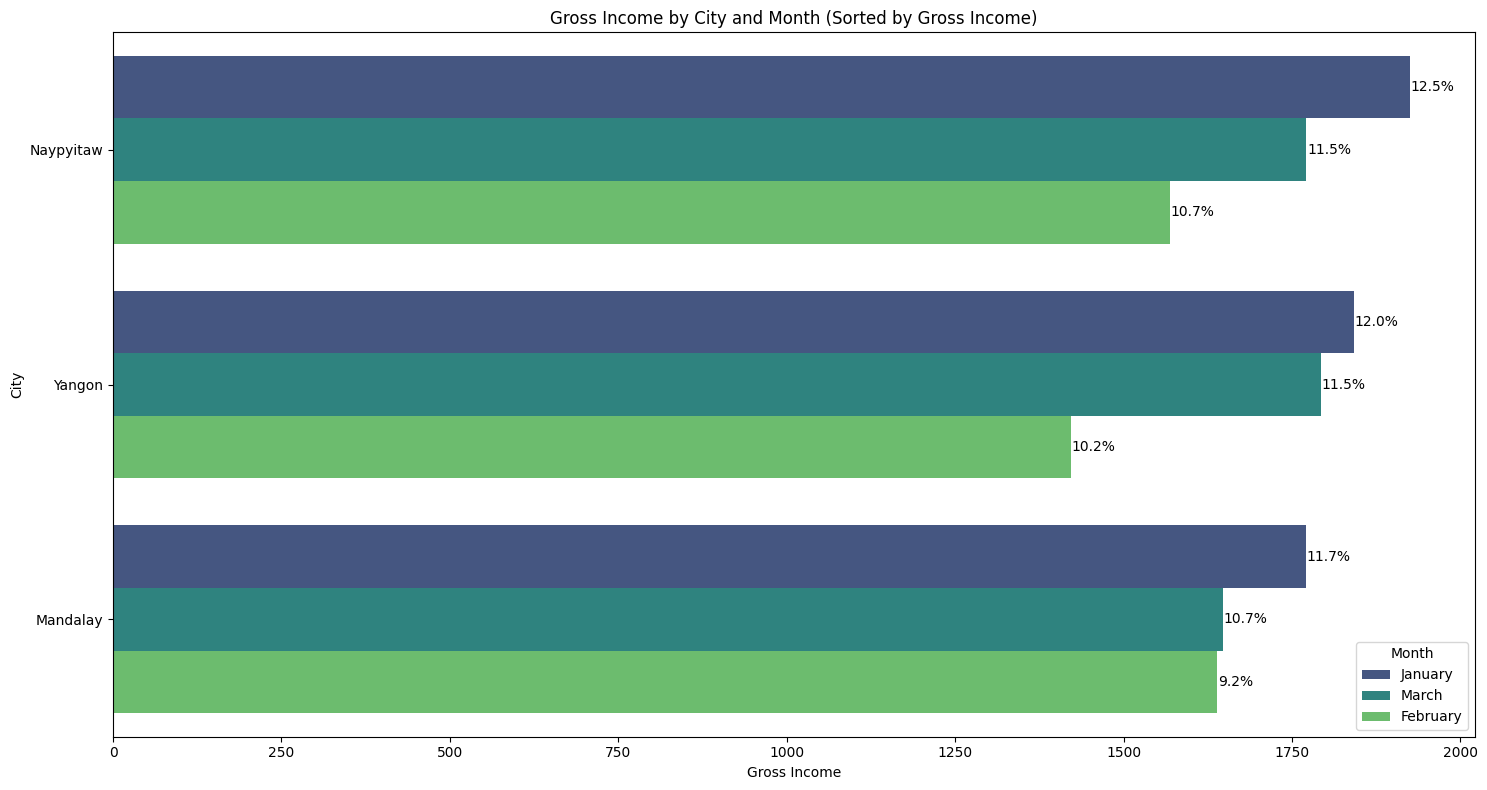

In [ ]:
city_month_gross = data.groupby(['City', 'Month'])['gross income'].sum().reset_index()

city_month_gross = city_month_gross.sort_values('gross income', ascending=False)

total_gross = city_month_gross['gross income'].sum()
city_month_gross['Percentage'] = (city_month_gross['gross income'] / total_gross) * 100

print(city_month_gross)

plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='gross income', y='City', hue='Month', data=city_month_gross, palette='viridis')
plt.xlabel('Gross Income')
plt.ylabel('City')
plt.title('Gross Income by City and Month (Sorted by Gross Income)')

for i, p in enumerate(bar_plot.patches):

    if p.get_width() > 0:
        width = p.get_width()
        plt.text(width + 1, p.get_y() + p.get_height() / 2,
                 f'{city_month_gross["Percentage"].iloc[i % len(city_month_gross)]:.1f}%',
                 ha='left', va='center')

plt.legend(title='Month')
plt.tight_layout()
plt.show()

Total Persentase pendapatan kotor di tiap kota rata-rata tertinggi di bulan january, dengan rincian sebagai berikut:

* Total persentase pendapatan kotor tertinggi di kota Naypyitaw yaitu di bulan january sebesar 12,5%
* Total persentase pendapatan kotor tertinggi di kota Yangon yaitu di bulan january sebesar 12%
* Total persentase pendapatan kotor tertinggi di kota Mandalay yaitu di bulan january sebesar 11,7%

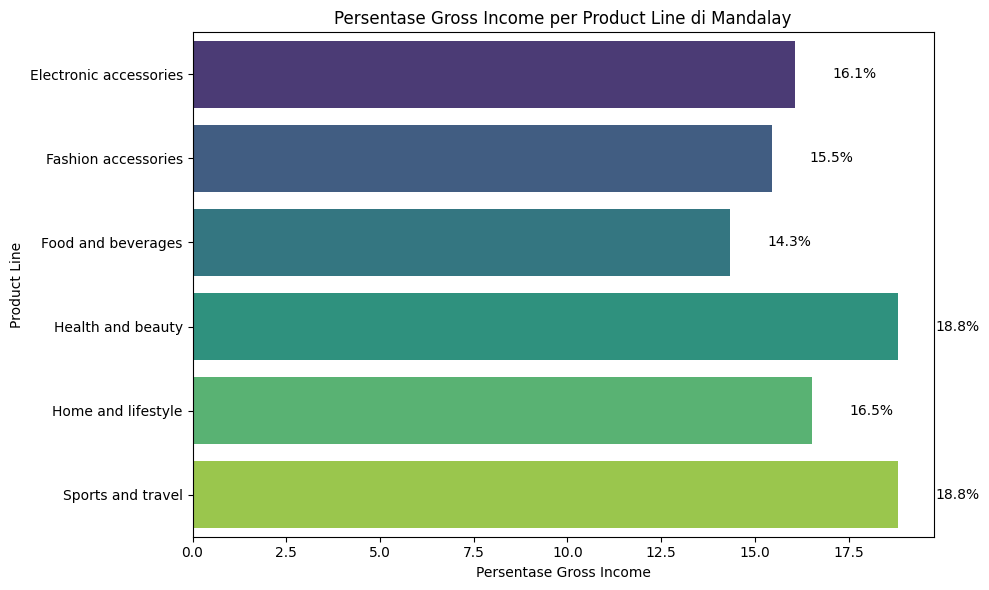

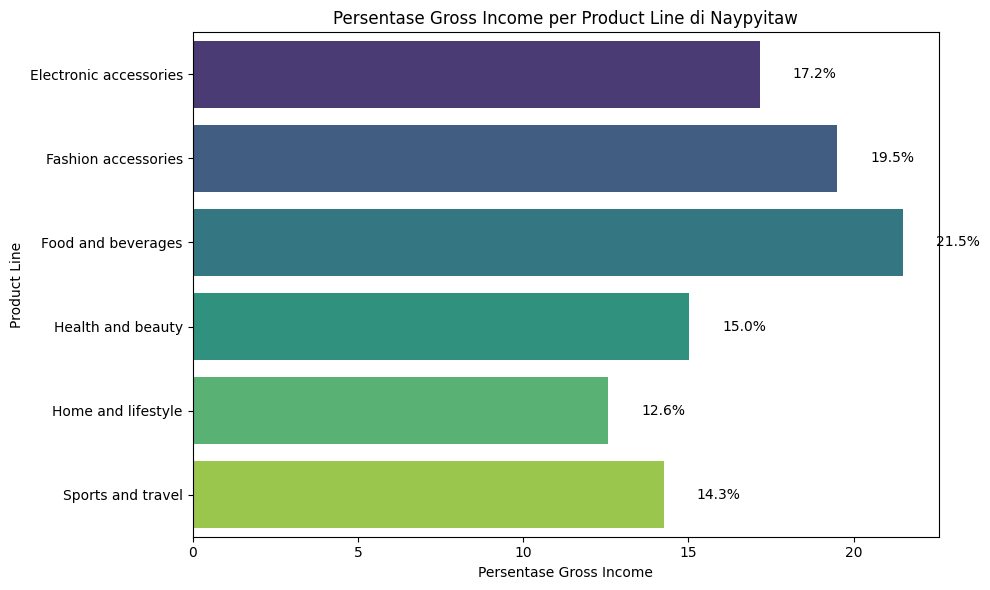

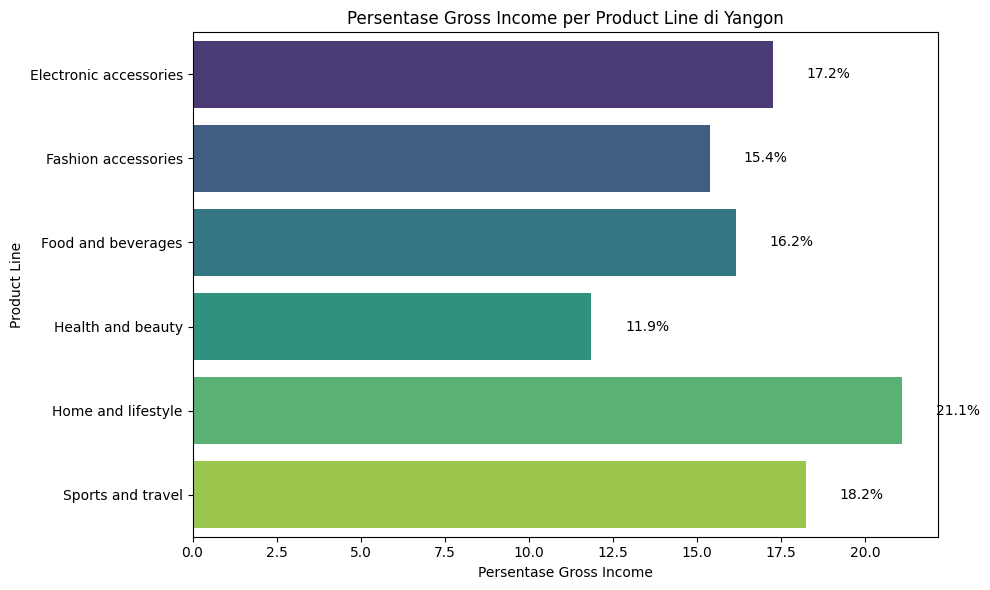

In [ ]:
city_product_gross = data.groupby(['City', 'Product line'])['gross income'].sum().reset_index()


city_product_gross['Percentage'] = city_product_gross.groupby('City')['gross income'].transform(lambda x: (x / x.sum()) * 100)


for city in city_product_gross['City'].unique():
  city_data = city_product_gross[city_product_gross['City'] == city]

  plt.figure(figsize=(10, 6))
  plt.title(f'Persentase Gross Income per Product Line di {city}')
  sns.barplot(x='Percentage', y='Product line', data=city_data, palette='viridis')
  plt.xlabel('Persentase Gross Income')
  plt.ylabel('Product Line')

  for i, p in enumerate(plt.gca().patches):
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{city_data["Percentage"].iloc[i]:.1f}%', ha='left', va='center')

  plt.tight_layout()
  plt.show()

In [ ]:
city_product_gross_income = data.groupby(['City', 'Product line'])['gross income'].sum().unstack()

city_product_gross_income_percentage = city_product_gross_income.div(city_product_gross_income.sum(axis=1), axis=0) * 100

for city in city_product_gross_income_percentage.index:
  print(f"\nCity: {city}")
  sorted_product_lines = city_product_gross_income_percentage.loc[city].sort_values(ascending=False)
  print(sorted_product_lines)


City: Mandalay
Product line
Sports and travel         18.821692
Health and beauty         18.814593
Home and lifestyle        16.524999
Electronic accessories    16.056325
Fashion accessories       15.455439
Food and beverages        14.326951
Name: Mandalay, dtype: float64

City: Naypyitaw
Product line
Food and beverages        21.495101
Fashion accessories       19.499251
Electronic accessories    17.155826
Health and beauty         15.027151
Sports and travel         14.255325
Home and lifestyle        12.567347
Name: Naypyitaw, dtype: float64

City: Yangon
Product line
Home and lifestyle        21.108397
Sports and travel         18.241650
Electronic accessories    17.247693
Food and beverages        16.161055
Fashion accessories       15.378956
Health and beauty         11.862250
Name: Yangon, dtype: float64


* Kategori produk dengan total Persentase pendapatan kotor tertinggi di kota Mandalay adalah kategori SportT& ravel sebesar 18,82%
* Kategori produk dengan total Persentase pendapatan kotor tertinggi di kota Naypyitaw adalah kategori Food & Beverages sebesar 21,49%
* Kategori produk dengan total Persentase pendapatan kotor tertinggi di kota Yongan adalah kategori Home & Lifestyle sebesar 21,10%


Product Line dengan Jumlah Transaksi Tertinggi untuk Setiap Gender:
   Gender         Product line  Transaction Count
1  Female  Fashion accessories                 96
9    Male    Health and beauty                 88


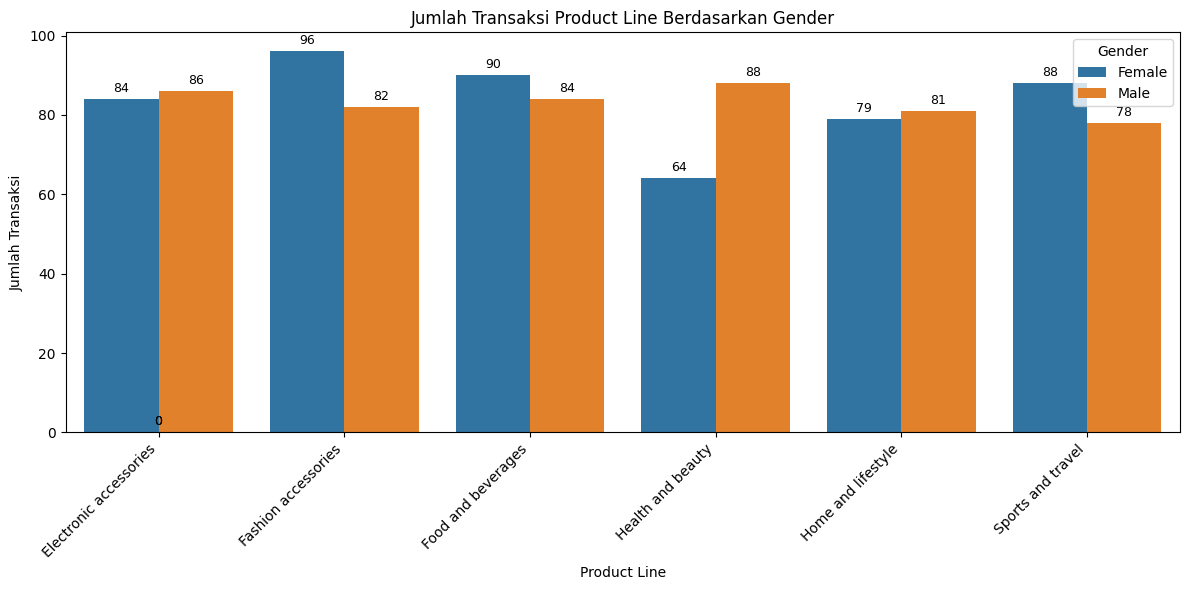

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group dan hitung jumlah transaksi per Gender dan Product Line
gender_product_transactions = data.groupby(['Gender', 'Product line'])['Invoice ID'].count().reset_index()
gender_product_transactions = gender_product_transactions.rename(columns={'Invoice ID': 'Transaction Count'})

# Mencari product line dengan transaksi terbanyak per gender
highest_transactions_per_gender = gender_product_transactions.loc[
    gender_product_transactions.groupby('Gender')['Transaction Count'].idxmax()
]

print("\nProduct Line dengan Jumlah Transaksi Tertinggi untuk Setiap Gender:")
print(highest_transactions_per_gender)

# Plot bar chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Product line',
    y='Transaction Count',
    hue='Gender',
    data=gender_product_transactions,
)

# Tambahkan label jumlah transaksi di atas tiap bar
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=9, color='black',
                     xytext=(0, 3),
                     textcoords='offset points')

# Tambahkan elemen visual lainnya
plt.xlabel('Product Line')
plt.ylabel('Jumlah Transaksi')
plt.title('Jumlah Transaksi Product Line Berdasarkan Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

* Produk dengan kategori Electronic accessories paling diminati oleh Male sebanyak 86 transaksi
* Produk dengan kategori Fashion accessoris paling diminati oleh Female sebanyak 96 transaksi
* Produk dengan kategori Food & Beverages paling diminati oleh Female sebanyak 90 transaksi
* Produk dengan kategori Health & Beauty paling diminati oleh Male sebanyak 88 transaksi
* Produk dengan kategori Home and Lifestyle paling diminati oleh Male sebanyak 81 transaksi
* Produk dengan kategori Sport & Travel paling diminati oleh Female sebanyak 88 transaksi

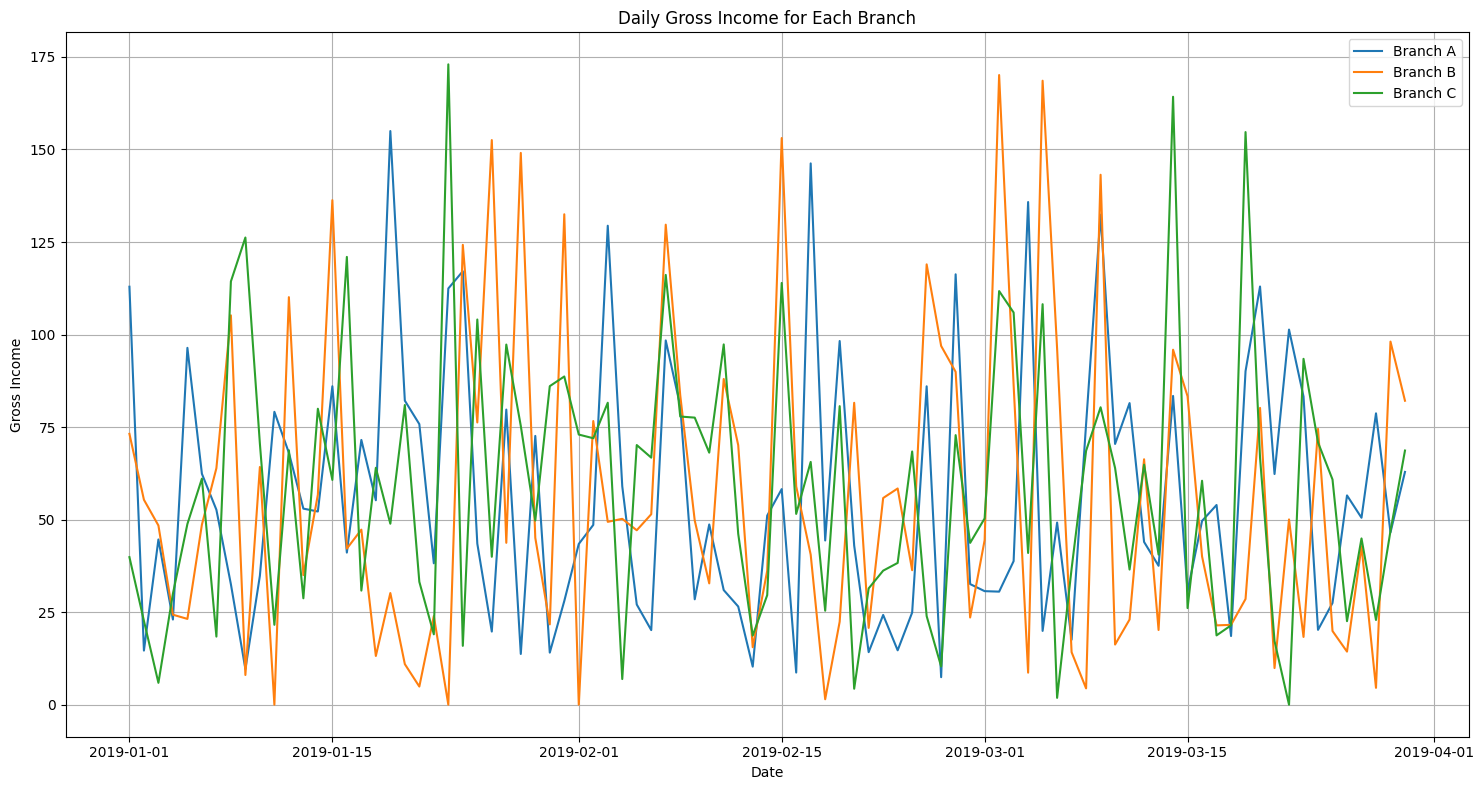

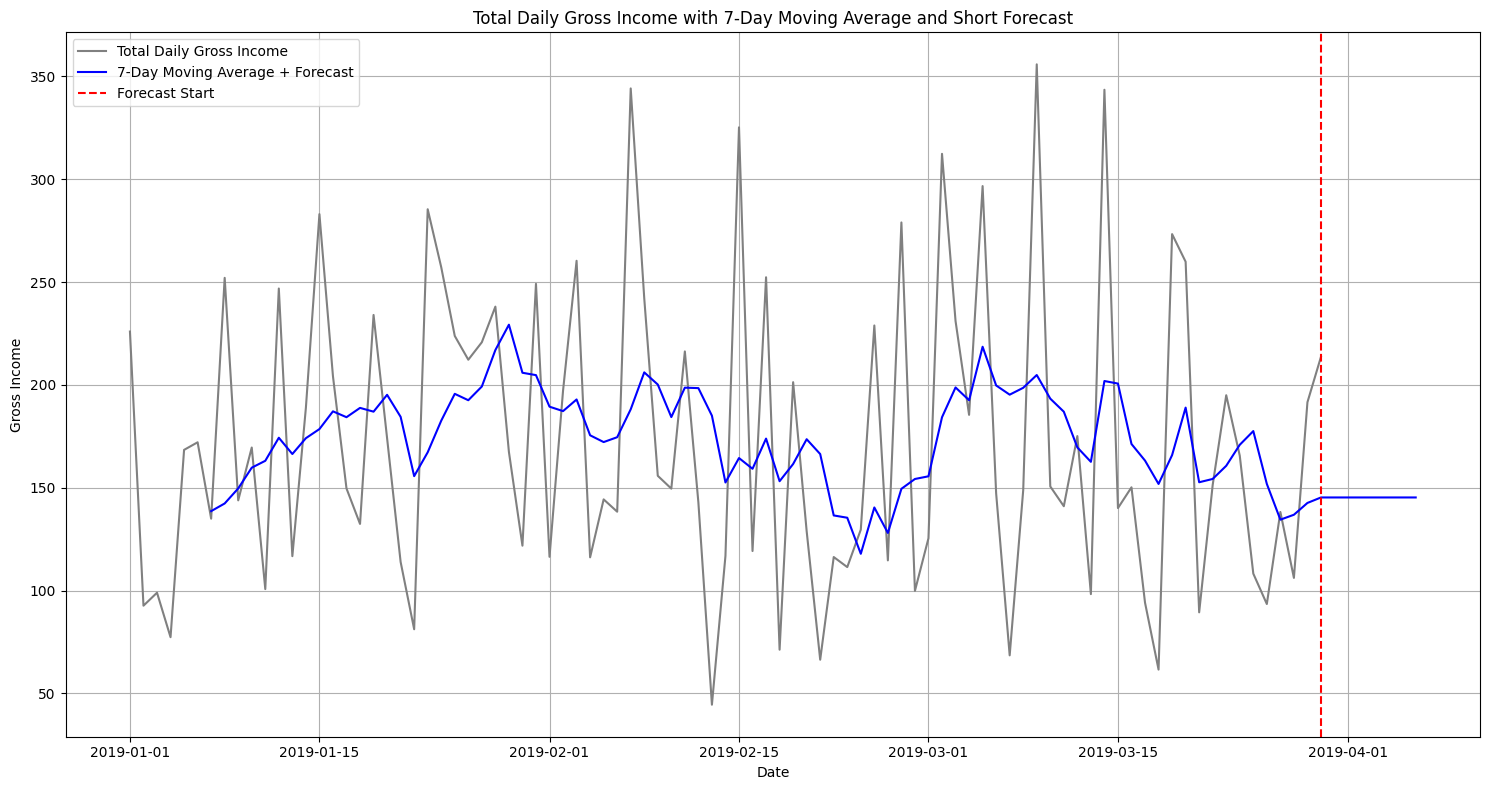

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kolom Date ke datetime
data['Date'] = pd.to_datetime(data['Date'])

# Gross income harian per cabang
daily_gross_income = data.groupby(['Date', 'Branch'])['gross income'].sum().unstack(fill_value=0)

# Plot gross income harian untuk setiap cabang
plt.figure(figsize=(15, 8))
for branch in daily_gross_income.columns:
    plt.plot(daily_gross_income.index, daily_gross_income[branch], label=f'Branch {branch}')

plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.title('Daily Gross Income for Each Branch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Total gross income harian (semua cabang)
total_daily_gross_income = data.groupby('Date')['gross income'].sum()

# Moving average 7 hari
window_size = 7
moving_average = total_daily_gross_income.rolling(window=window_size).mean()

# Buat prediksi 7 hari ke depan
future_dates = pd.date_range(start=total_daily_gross_income.index[-1] + pd.Timedelta(days=1), periods=7)
future_series = pd.Series(index=future_dates, dtype='float64')

# Gabungkan data historis dengan future kosong
extended_series = pd.concat([moving_average, future_series])

# Lakukan interpolasi linear untuk prediksi
extended_series = extended_series.interpolate(method='linear')

# Plot hasil
plt.figure(figsize=(15, 8))
plt.plot(total_daily_gross_income.index, total_daily_gross_income, label='Total Daily Gross Income', color='gray')
plt.plot(extended_series.index, extended_series, label='7-Day Moving Average + Forecast', color='blue')
plt.axvline(x=total_daily_gross_income.index[-1], linestyle='--', color='red', label='Forecast Start')
plt.xlabel('Date')
plt.ylabel('Gross Income')
plt.title('Total Daily Gross Income with 7-Day Moving Average and Short Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Branch A:

* Sering terlihat stabil di rentang 25–100, tetapi juga mengalami lonjakan dan penurunan tajam.

* Beberapa hari memiliki gross income hampir nol, artinya tidak ada transaksi atau sangat sedikit.

Branch B:

* Memiliki lonjakan paling tajam dan juga penurunan mendadak.

* Terlihat paling volatil di antara ketiganya, tapi juga punya beberapa hari dengan pendapatan sangat tinggi.

Branch C:

* Pola mirip seperti A dan B, tetapi memiliki beberapa periode dengan gross income lebih rendah.

* Menunjukkan adanya ketidakteraturan dalam performa harian.



---


* Moving Average Menunjukkan Tren Lebih Stabil. Rata-rata bergerak 7 hari menghaluskan fluktuasi dan menunjukkan pola musiman yang lebih bisa diamati.Terlihat ada kenaikan tren rata-rata pada pertengahan Januari hingga awal Februari, kemudian sedikit menurun dan naik lagi di awal Maret.

* Forecast dimulai setelah garis vertikal merah (menjelang April 2019). Nilai prediksi tampak mendatar dan stagnan, sekitar 140–150, menandakan metode ini tidak mendeteksi tren naik atau turun yang signifikan di masa depan (karena hanya berbasis moving average).

In [ ]:
city_month_product_transactions = data.groupby(['City', 'Month', 'Product line'])['Invoice ID'].count().reset_index()

city_month_product_transactions = city_month_product_transactions.rename(columns={'Invoice ID': 'Transaction Count'})

highest_transactions_per_city_month = city_month_product_transactions.loc[city_month_product_transactions.groupby(['City', 'Month'])['Transaction Count'].idxmax()]

print("\nProduct Line dengan Jumlah Transaksi Tertinggi di Setiap Kota dan Bulan:")
print(highest_transactions_per_city_month)


Product Line dengan Jumlah Transaksi Tertinggi di Setiap Kota dan Bulan:
         City     Month            Product line  Transaction Count
1    Mandalay  February     Fashion accessories                 24
11   Mandalay   January       Sports and travel                 23
16   Mandalay     March      Home and lifestyle                 22
20  Naypyitaw  February      Food and beverages                 24
25  Naypyitaw   January     Fashion accessories                 23
30  Naypyitaw     March  Electronic accessories                 23
38     Yangon  February      Food and beverages                 21
46     Yangon   January      Home and lifestyle                 27
52     Yangon     March      Home and lifestyle                 25


# Insights Summary & Recommendation

1. Branch (Cabang)
* Cabang A memiliki 34% dari total transaksi, sementara dua cabang lainnya mencatatkan persentase transaksi yang hampir sama, yaitu 33,2% dan 32,8%. Meskipun distribusi transaksi antar cabang relatif merata, penting untuk memperhatikan bahwa Cabang A menunjukkan potensi terbesar untuk dikembangkan lebih lanjut karena mendekati persentase transaksi tertinggi.

* Rekomendasi Kebijakan:
(1) Pengembangan strategi promosi lokal di Cabang A untuk meningkatkan penjualan lebih lanjut. Ini bisa dilakukan dengan program loyalitas khusus atau diskon eksklusif untuk meningkatkan daya tarik cabang ini.
(2) Meningkatkan layanan di cabang yang lain (Cabang B dan C) dengan menganalisis faktor-faktor lokal yang dapat menarik lebih banyak pelanggan, seperti penyesuaian produk atau pelayanan yang lebih baik.

2. City (Kota)
* Yangon mencatatkan jumlah transaksi terbanyak (34%), diikuti oleh Mandalay (33,2%) dan Naypyitaw (32,8%). Namun, Naypyitaw menghasilkan pendapatan terbesar dengan gross income tertinggi (5265.1765).

* Rekomendasi Kebijakan:
(1) Memprioritaskan strategi peningkatan pendapatan di Naypyitaw, karena meskipun persentase transaksi lebih rendah, kota ini menghasilkan pendapatan tertinggi. Ini bisa dilakukan dengan memperluas lini produk yang paling menguntungkan di sana, seperti Food and Beverages dan Fashion Accessories.
(2) Untuk Yangon dan Mandalay, perlu adanya peningkatan penjualan pada kategori produk dengan performa terendah seperti Health and Beauty di Yangon dan Food and Beverages di Mandalay melalui kampanye promosi yang ditargetkan.

3. Product Line (Kategori Produk)
* Naypyitaw: Produk Food and Beverages dan Fashion Accessories memberikan kontribusi tertinggi terhadap pendapatan.
* Yangon: Produk Home and Lifestyle dan Sports and Travel merupakan kontributor utama pendapatan.
* Mandalay: Produk Sports and Travel dan Health and Beauty menunjukkan performa terbaik.

* Rekomendasi Kebijakan:
(1) Fokus pada lini produk unggulan per kota. Di Naypyitaw, fokuslah pada promosi dan stok untuk kategori Food and Beverages dan Fashion Accessories. Di Yangon, prioritaskan Home and Lifestyle, sementara di Mandalay, tingkatkan stok dan promosi untuk Sports and Travel serta Health and Beauty.
(2) Meningkatkan performa lini produk dengan kontribusi terendah di setiap kota melalui kampanye diskon atau bundling produk, terutama Home and Lifestyle di Naypyitaw dan Health and Beauty di Yangon.

4. Month (Bulan)
* Bulan Januari merupakan puncak transaksi dengan 35% dari total transaksi, diikuti oleh bulan Maret (34,5%) dan Februari (30,3%).

* Rekomendasi Kebijakan:
(1) Optimalisasi promosi di bulan Januari dengan meluncurkan kampanye besar untuk menarik lebih banyak pelanggan, mengingat ini merupakan puncak transaksi tahunan.
(2) Tingkatkan promosi untuk bulan kedua dan ketiga melalui penawaran diskon setelah liburan untuk menjaga momentum penjualan.

5. Tipe Customer
* Transaksi antara member dan non-member hampir setara.

* Rekomendasi Kebijakan:
(1) Perkuat program loyalitas untuk member agar mereka lebih sering berbelanja. Tambahkan insentif seperti poin yang bisa ditukarkan dengan diskon atau hadiah.
(2) Arahkan promosi untuk mengkonversi pelanggan non-member menjadi member, sehingga dapat meningkatkan retensi pelanggan.

6. Gender
* Transaksi antara male dan female hampir setara.

* Rekomendasi Kebijakan:
Sesuaikan promosi berdasarkan gender, misalnya promosi kesehatan dan kecantikan untuk pelanggan wanita dan promosi elektronik atau olahraga untuk pelanggan pria. Namun, tetap harus fleksibel dengan tren konsumsi.

7. Payment (Metode Pembayaran)
* Mayoritas pelanggan lebih suka menggunakan e-wallet dan cash dibandingkan credit card.

* Rekomendasi Kebijakan:
(1) Promosikan penggunaan e-wallet dengan memberikan cashback atau diskon tambahan bagi yang menggunakan metode ini.
(2) Tingkatkan opsi pembayaran non-tunai, termasuk meningkatkan kemudahan akses dan penawaran terkait penggunaan e-wallet, karena ini merupakan preferensi utama pelanggan.


---


# Kesimpulan Umum dan Strategi untuk Meningkatkan Pendapatan
* Optimalisasi kategori produk unggulan per kota berdasarkan performa penjualan dan kontribusi terhadap pendapatan.
* Memaksimalkan promosi pada bulan-bulan dengan transaksi terbanyak dan memperkenalkan kampanye strategis di bulan dengan penjualan rendah.
* Perkuat hubungan dengan pelanggan melalui program loyalitas dan kampanye promosi yang ditargetkan, terutama untuk meningkatkan retensi pelanggan dan konversi non-member menjadi member.
* Promosikan metode pembayaran digital untuk meningkatkan kenyamanan dan daya tarik bagi pelanggan yang lebih memilih e-wallet.


---


Dengan menerapkan kebijakan ini, supermarket dapat meningkatkan pendapatan secara signifikan serta mempertahankan loyalitas pelanggan.

